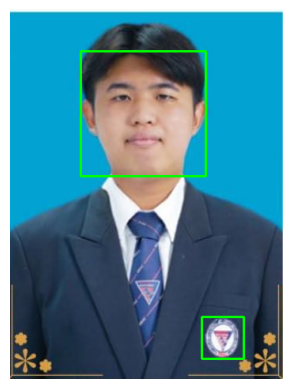

In [4]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("tle1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(gray, 1.1, 5)
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x,y), (x+w , y+h), (0, 255, 0), 2)
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
# cv2.imwrite('tle3.jpg',image)

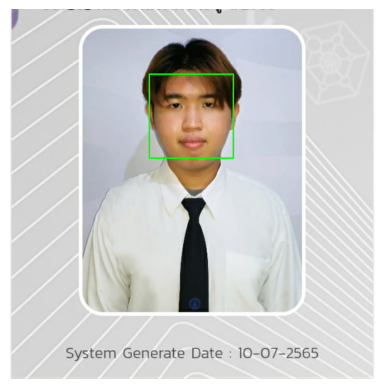

In [5]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("tle2.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(gray, 1.1, 5)
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x,y), (x+w , y+h), (0, 255, 0), 2)
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
# cv2.imwrite('tle3.jpg',image)

In [2]:
import face_recognition
import cv2
import numpy as np

# This is a super simple (but slow) example of running face recognition on live video from your webcam.
# There's a second example that's a little more complicated but runs faster.

# PLEASE NOTE: This example requires OpenCV (the `cv2` library) to be installed only to read from your webcam.
# OpenCV is *not* required to use the face_recognition library. It's only required if you want to run this
# specific demo. If you have trouble installing it, try any of the other demos that don't require it instead.

# Get a reference to webcam #0 (the default one)
video_capture = cv2.VideoCapture(0)

# Load a sample picture and learn how to recognize it.
obama_image = face_recognition.load_image_file("chavalit.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# Load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file("tle1.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Barack Obama",
    "Joe Biden"
]

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_frame = frame[:, :, ::-1]

    # Find all the faces and face enqcodings in the frame of video
    face_locations = face_recognition.face_locations(rgb_frame)
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

    # Loop through each face in this frame of video
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # See if the face is a match for the known face(s)
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

        name = "Unknown"

        # If a match was found in known_face_encodings, just use the first one.
        # if True in matches:
        #     first_match_index = matches.index(True)
        #     name = known_face_names[first_match_index]

        # Or instead, use the known face with the smallest distance to the new face
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()

TypeError: compute_face_descriptor(): incompatible function arguments. The following argument types are supported:
    1. (self: _dlib_pybind11.face_recognition_model_v1, img: numpy.ndarray[(rows,cols,3),numpy.uint8], face: _dlib_pybind11.full_object_detection, num_jitters: int = 0, padding: float = 0.25) -> _dlib_pybind11.vector
    2. (self: _dlib_pybind11.face_recognition_model_v1, img: numpy.ndarray[(rows,cols,3),numpy.uint8], num_jitters: int = 0) -> _dlib_pybind11.vector
    3. (self: _dlib_pybind11.face_recognition_model_v1, img: numpy.ndarray[(rows,cols,3),numpy.uint8], faces: _dlib_pybind11.full_object_detections, num_jitters: int = 0, padding: float = 0.25) -> _dlib_pybind11.vectors
    4. (self: _dlib_pybind11.face_recognition_model_v1, batch_img: List[numpy.ndarray[(rows,cols,3),numpy.uint8]], batch_faces: List[_dlib_pybind11.full_object_detections], num_jitters: int = 0, padding: float = 0.25) -> _dlib_pybind11.vectorss
    5. (self: _dlib_pybind11.face_recognition_model_v1, batch_img: List[numpy.ndarray[(rows,cols,3),numpy.uint8]], num_jitters: int = 0) -> _dlib_pybind11.vectors

Invoked with: <_dlib_pybind11.face_recognition_model_v1 object at 0x000001EE78C22D30>, array([[[159, 150, 145],
        [159, 150, 145],
        [160, 149, 146],
        ...,
        [182, 165, 164],
        [190, 172, 170],
        [171, 153, 151]],

       [[159, 150, 145],
        [159, 150, 145],
        [160, 149, 146],
        ...,
        [187, 170, 169],
        [185, 168, 166],
        [163, 145, 142]],

       [[160, 149, 144],
        [160, 149, 145],
        [160, 149, 146],
        ...,
        [192, 177, 175],
        [177, 161, 157],
        [151, 135, 130]],

       ...,

       [[ 98,  54,  53],
        [ 98,  54,  53],
        [ 98,  54,  52],
        ...,
        [ 30,  30,  36],
        [ 29,  29,  36],
        [ 27,  27,  35]],

       [[ 98,  54,  53],
        [ 98,  54,  53],
        [ 98,  54,  53],
        ...,
        [ 51,  50,  56],
        [ 44,  43,  51],
        [ 38,  37,  46]],

       [[ 98,  54,  53],
        [ 98,  54,  53],
        [ 98,  54,  53],
        ...,
        [103, 102, 108],
        [ 96,  95, 103],
        [ 92,  91, 100]]], dtype=uint8), <_dlib_pybind11.full_object_detection object at 0x000001EE618A7930>, 1

In [9]:
import face_recognition

picture_of_me = face_recognition.load_image_file("tle1.jpg")
my_face_encoding = face_recognition.face_encodings(picture_of_me)[0]

# my_face_encoding now contains a universal 'encoding' of my facial features that can be compared to any other picture of a face!

unknown_picture = face_recognition.load_image_file("chavalit.jpg")
unknown_face_encoding = face_recognition.face_encodings(unknown_picture)[0]

# Now we can see the two face encodings are of the same person with `compare_faces`!

results = face_recognition.compare_faces([my_face_encoding], unknown_face_encoding)

if results[0] == True:
    print("It's a picture of me!")
else:
    print("It's not a picture of me!")

It's a picture of me!


: 